# Dataset tidying, class balance, encoding, normalization -> regular train and test subsets

<font color='blue'>Creation of balanced dataset</font>

#### 1.1 Module loading

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
import os.path

#### 0. Variables

In [10]:
ds = "20"
fraction_factor = 1.5

> I fixed the *names = columns_csv* for more fexibility

#### 1.2 Dataset loading

In [11]:
#pathds = '/home/user/01Code/00Datasets_final/helpers/'
pathds = os.path.abspath('/home/user/01Code/00Datasets_final/')
file_name = "sybil_"+ds+"n_with-malicious_labelled.csv"
full_path = os.path.join(pathds,file_name)
print(full_path)

/home/user/01Code/00Datasets_final/sybil_20n_with-malicious_labelled.csv


In [12]:
#Columns
columns_csv = "frame_time_delta,frame_time_epoch,frame_time_relative,frame_cap_len,frame_len,frame_number,ipv6_src,ipv6_dst,ipv6_plen,sixlowpan_pattern,wpan_ack_request,wpan_dst_addr_mode,wpan_fcf,wpan_fcs,wpan_frame_length,wpan_pending,wpan_seq_no,icmpv6_checksum,icmpv6_code,class".split(",")

In [13]:
#Full DS
df_full = pd.read_csv(full_path, low_memory=False, sep=',', names=columns_csv, skiprows=1)
df_full_size = df_full.shape[0]
print(df_full.shape)

(1849294, 20)


In [14]:
#DS third of the total
df_chunk = pd.read_csv(full_path, low_memory=False, sep=',', names=columns_csv, skiprows=1, chunksize=1000)
df = df_chunk.get_chunk(int(df_full_size/fraction_factor))

In [15]:
print(df.shape)

(1232862, 20)


In [16]:
df.head()

,frame_time_delta,frame_time_epoch,frame_time_relative,frame_cap_len,frame_len,frame_number,ipv6_src,ipv6_dst,ipv6_plen,sixlowpan_pattern,wpan_ack_request,wpan_dst_addr_mode,wpan_fcf,wpan_fcs,wpan_frame_length,wpan_pending,wpan_seq_no,icmpv6_checksum,icmpv6_code,class
0,0.000000,1.554230e+09,0.000000,64,64,1,fe80::c30c:0:0:5,ff02::1a,6,0x00000041,0,0x00000002,0x0000d841,0x0000342b,64,0,38,0x0000a40f,0,0
1,0.003288,1.554230e+09,0.003288,64,64,2,fe80::c30c:0:0:5,ff02::1a,6,0x00000041,0,0x00000002,0x0000d841,0x0000342b,64,0,38,0x0000a40f,0,0
2,0.003264,1.554230e+09,0.006552,64,64,3,fe80::c30c:0:0:5,ff02::1a,6,0x00000041,0,0x00000002,0x0000d841,0x0000342b,64,0,38,0x0000a40f,0,0
3,0.003296,1.554230e+09,0.009848,64,64,4,fe80::c30c:0:0:5,ff02::1a,6,0x00000041,0,0x00000002,0x0000d841,0x0000342b,64,0,38,0x0000a40f,0,0
4,0.003273,1.554230e+09,0.013121,64,64,5,fe80::c30c:0:0:5,ff02::1a,6,0x00000041,0,0x00000002,0x0000d841,0x0000342b,64,0,38,0x0000a40f,0,0


In [17]:
X = df.iloc[:, 0:19] 
y = df.iloc[:, 19]

In [18]:
X.describe()

,frame_time_delta,frame_time_epoch,frame_time_relative,frame_cap_len,frame_len,frame_number,ipv6_plen,wpan_ack_request,wpan_frame_length,wpan_pending,wpan_seq_no,icmpv6_code
count,1.232862e+06,1.232862e+06,1.232862e+06,1.232862e+06,1.232862e+06,1.232862e+06,1.232862e+06,1.232862e+06,1.232862e+06,1.232862e+06,1.232862e+06,1.232862e+06
mean,9.799559e-03,1.554160e+09,5.503771e+01,8.527583e+01,8.527583e+01,1.206380e+04,5.933904e+01,7.880460e-01,8.527583e+01,2.926524e-03,1.015432e+02,1.541357e+00
std,1.546965e-01,1.265462e+05,6.108300e+01,1.216493e+01,1.216493e+01,7.796361e+03,1.544521e+01,4.086926e-01,1.216493e+01,5.401816e-02,7.342214e+01,5.496890e-01
min,-3.099000e-03,1.553719e+09,0.000000e+00,6.400000e+01,6.400000e+01,1.000000e+00,6.000000e+00,0.000000e+00,6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.880000e-04,1.554163e+09,1.534090e+01,7.600000e+01,7.600000e+01,5.548000e+03,5.000000e+01,1.000000e+00,7.600000e+01,0.000000e+00,4.100000e+01,1.000000e+00
50%,1.987000e-03,1.554229e+09,3.212012e+01,7.600000e+01,7.600000e+01,1.135700e+04,5.000000e+01,1.000000e+00,7.600000e+01,0.000000e+00,9.000000e+01,2.000000e+00
75%,3.327000e-03,1.554235e+09,6.649227e+01,9.700000e+01,9.700000e+01,1.764700e+04,7.600000e+01,1.000000e+00,9.700000e+01,0.000000e+00,1.680000e+02,2.000000e+00
max,2.545275e+01,1.554242e+09,2.980147e+02,1.020000e+02,1.020000e+02,3.868600e+04,7.600000e+01,1.000000e+00,1.020000e+02,1.000000e+00,2.550000e+02,2.000000e+00


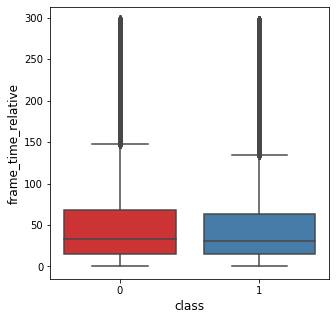

In [19]:
plt.figure(figsize=(5,5))

sns.boxplot(x='class', y='frame_time_relative', data=df, palette="Set1")

# Changing default seaborn/matplotlib to be more readable
plt.xlabel('class', fontsize = 12)
plt.ylabel('frame_time_relative', fontsize = 12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.savefig('area_delta_class.png')

### 2. Dropping of nan values in rows and columns

#### 2.1 Finding if there is any column or row with nan values

In [20]:
nan_df = df.isnull().any().tolist()

if True in nan_df: print('**There is nans in df_test!**\n\n', df.isnull().any())
else: print("No nans df")

No nans df


> As it is True in some columns (features) It was required to remove this samples

In [21]:
df.isnull().sum()

frame_time_delta       0
frame_time_epoch       0
frame_time_relative    0
frame_cap_len          0
frame_len              0
frame_number           0
ipv6_src               0
ipv6_dst               0
ipv6_plen              0
sixlowpan_pattern      0
wpan_ack_request       0
wpan_dst_addr_mode     0
wpan_fcf               0
wpan_fcs               0
wpan_frame_length      0
wpan_pending           0
wpan_seq_no            0
icmpv6_checksum        0
icmpv6_code            0
class                  0
dtype: int64

#### 2.2 Removing any nan value in any row or column

In [22]:
df_nonan_row = df.dropna(axis=0, how='all') #dropping rows whose any value is nan 

In [23]:
df_nonan_rowcol = df_nonan_row.dropna(axis=1, how='any') #dropping columns whose any value is nan 

In [24]:
df = df_nonan_rowcol # dataset without nan values

In [25]:
nan_df = df.isnull().any().tolist()

if True in nan_df: print('**There is nans in df_test!**\n\n', df.isnull().any())
else: print("No nans df")

No nans df


> As is expected the dataset is now ready to the next step

In [26]:
df.shape

(1232862, 20)

### 3. Special care of hex values in string format

#### 3.1 Conversion of sring values into int

In [27]:
df['wpan_dst_addr_mode'] = df.wpan_dst_addr_mode.apply(int, base=16)
df['wpan_fcf'] = df.wpan_fcf.apply(int, base=16)
df['wpan_fcs'] = df.wpan_fcs.apply(int, base=16)
df['sixlowpan_pattern'] = df.sixlowpan_pattern.apply(int, base=16)
df['icmpv6_checksum'] = df.icmpv6_checksum.apply(int, base=16)

> Two features exhibited values in unsigned byte type (string hex values), therefore it was necessary to convert them into int values

In [28]:
df.head()

,frame_time_delta,frame_time_epoch,frame_time_relative,frame_cap_len,frame_len,frame_number,ipv6_src,ipv6_dst,ipv6_plen,sixlowpan_pattern,wpan_ack_request,wpan_dst_addr_mode,wpan_fcf,wpan_fcs,wpan_frame_length,wpan_pending,wpan_seq_no,icmpv6_checksum,icmpv6_code,class
0,0.000000,1.554230e+09,0.000000,64,64,1,fe80::c30c:0:0:5,ff02::1a,6,65,0,2,55361,13355,64,0,38,41999,0,0
1,0.003288,1.554230e+09,0.003288,64,64,2,fe80::c30c:0:0:5,ff02::1a,6,65,0,2,55361,13355,64,0,38,41999,0,0
2,0.003264,1.554230e+09,0.006552,64,64,3,fe80::c30c:0:0:5,ff02::1a,6,65,0,2,55361,13355,64,0,38,41999,0,0
3,0.003296,1.554230e+09,0.009848,64,64,4,fe80::c30c:0:0:5,ff02::1a,6,65,0,2,55361,13355,64,0,38,41999,0,0
4,0.003273,1.554230e+09,0.013121,64,64,5,fe80::c30c:0:0:5,ff02::1a,6,65,0,2,55361,13355,64,0,38,41999,0,0


### 4. Dataset Pre-processing 

#### 4.1 Finding out features data type 

In [29]:
df.columns

Index(['frame_time_delta', 'frame_time_epoch', 'frame_time_relative',
       'frame_cap_len', 'frame_len', 'frame_number', 'ipv6_src', 'ipv6_dst',
       'ipv6_plen', 'sixlowpan_pattern', 'wpan_ack_request',
       'wpan_dst_addr_mode', 'wpan_fcf', 'wpan_fcs', 'wpan_frame_length',
       'wpan_pending', 'wpan_seq_no', 'icmpv6_checksum', 'icmpv6_code',
       'class'],
      dtype='object')

In [30]:
df.get_dtype_counts()

/home/user/anaconda3/envs/deepl/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


float64     3
int64      15
object      2
dtype: int64

In [31]:
df.select_dtypes('object').columns

Index(['ipv6_src', 'ipv6_dst'], dtype='object')

> It is necessary to encode the object dtype features into numerical, using Label Encoding. Also it is indispensable to encode any others categorical features such as icmpv6.type, icmpv6.code , 6lowpan.pattern, wpan.dst_addr_mode using one-hot (1-to-n) encoding.

#### 4.2 Explaining the data

Class 0: 874988
Class 1: 357874
Proportion: 2.445 : 1


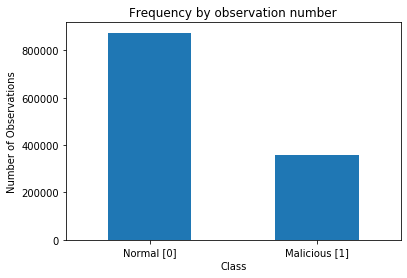

In [32]:
#if you don't have an intuitive sense of how imbalanced these two classes are, let's go visual
count_classes = pd.value_counts(df['class'], sort = True)
print('Class 0:', count_classes[0])
print('Class 1:', count_classes[1])
print('Proportion:', round(count_classes[0] / count_classes[1], 3), ': 1')

count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Normal [0]','Malicious [1]'])
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

##### 4.2.1 Dataset Balancing by ROS

In [33]:
X = df.iloc[:, 0:19] 
y = df.iloc[:, 19]

517114 new random picked points
Class 0: 874988
Class 1: 874988
Proportion: 1.0 : 1


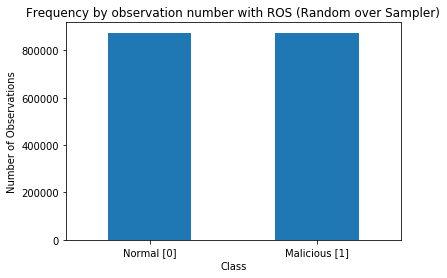

In [34]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

count_classes_ros = pd.value_counts(y_ros, sort = True)
print('Class 0:', count_classes_ros[0])
print('Class 1:', count_classes_ros[1])
print('Proportion:', round(count_classes_ros[0] / count_classes_ros[1], 2), ': 1')

count_classes_ros.plot(kind = 'bar', rot=0)
plt.xticks(range(2), ['Normal [0]','Malicious [1]'])
plt.title("Frequency by observation number with ROS (Random over Sampler)")
plt.xlabel("Class")
plt.ylabel("Number of Observations");

In [35]:
columns_csv_ros = df.columns.tolist()[:-1]
# columns_csv_ros

In [36]:
df_y_ros = pd.DataFrame(y_ros, columns=['class'])
print(df_y_ros.shape)

df_x_ros = pd.DataFrame(X_ros, columns=columns_csv_ros)
print(df_x_ros.shape)

(1749976, 1)
(1749976, 19)


In [37]:
df_ros = pd.concat([df_x_ros, df_y_ros], axis=1, ignore_index=False)
print(df_ros.shape)

(1749976, 20)


In [38]:
df = df_ros

In [39]:
df.head()

,frame_time_delta,frame_time_epoch,frame_time_relative,frame_cap_len,frame_len,frame_number,ipv6_src,ipv6_dst,ipv6_plen,sixlowpan_pattern,wpan_ack_request,wpan_dst_addr_mode,wpan_fcf,wpan_fcs,wpan_frame_length,wpan_pending,wpan_seq_no,icmpv6_checksum,icmpv6_code,class
0,0,1.55423e+09,0,64,64,1,fe80::c30c:0:0:5,ff02::1a,6,65,0,2,55361,13355,64,0,38,41999,0,0
1,0.003288,1.55423e+09,0.003288,64,64,2,fe80::c30c:0:0:5,ff02::1a,6,65,0,2,55361,13355,64,0,38,41999,0,0
2,0.003264,1.55423e+09,0.006552,64,64,3,fe80::c30c:0:0:5,ff02::1a,6,65,0,2,55361,13355,64,0,38,41999,0,0
3,0.003296,1.55423e+09,0.009848,64,64,4,fe80::c30c:0:0:5,ff02::1a,6,65,0,2,55361,13355,64,0,38,41999,0,0
4,0.003273,1.55423e+09,0.013121,64,64,5,fe80::c30c:0:0:5,ff02::1a,6,65,0,2,55361,13355,64,0,38,41999,0,0


#### 4.2 Label encoding for columns 'ipv6_src', 'ipv6_dst'

In [40]:
le = LabelEncoder()
df.iloc[:,6] = le.fit_transform(df.iloc[:,6])
df.iloc[:,7] = le.fit_transform(df.iloc[:,7])

In [41]:
print("Unique values for ipv6_src feature",df.iloc[:,6].unique())
print("Unique values for ipv6_dst feature",df.iloc[:,7].unique())

Unique values for ipv6_src feature [ 8  5  1  3  9 16 12  2  0 13 18 17 10  7  6  4 11 15 14]
Unique values for ipv6_dst feature [19  0 18 17  6  2  7 16 15 10 14  3 13  4 11  8  5  9  1 12]


> As it is showed, the former object values are now numerical 

#### 4.3 Normalization of frame_time_epoch

In [42]:
df['frame_time_epoch'] = df['frame_time_epoch'].astype(float)

In [43]:
# df['frame_time_epoch'] = df['frame_time_epoch'] - df.frame_time_epoch.min()

In [44]:
df.frame_time_epoch.describe()

count    1.749976e+06
mean     1.554161e+09
std      1.247235e+05
min      1.553719e+09
25%      1.554167e+09
50%      1.554229e+09
75%      1.554235e+09
max      1.554242e+09
Name: frame_time_epoch, dtype: float64

In [45]:
df['frame_time_epoch'] = np.log1p(df['frame_time_epoch'])

In [46]:
df.frame_time_epoch.describe()

count    1.749976e+06
mean     2.116420e+01
std      8.025748e-05
min      2.116392e+01
25%      2.116421e+01
50%      2.116425e+01
75%      2.116425e+01
max      2.116425e+01
Name: frame_time_epoch, dtype: float64

In [47]:
# df.head()

#### 4.4 One hot encoding of categorical features using ColumnTransformer and standard scaler normalization

In [48]:
onehot_col = ['ipv6_dst', 'ipv6_src', 'icmpv6_code', 'wpan_dst_addr_mode', 'wpan_fcf', 'sixlowpan_pattern']
#onehot_col

In [49]:
#log_col = df.select_dtypes('float').columns.tolist()
#log_col = ['frame_time_delta', 'frame_time_epoch', 'frame_time_relative']
#log_col = []

In [50]:
int_col = ['frame_time_delta', 'frame_time_epoch', 'frame_time_relative', 'frame_cap_len', 'frame_len', 'frame_number', 'wpan_fcs', 'wpan_frame_length', 'wpan_seq_no', 'ipv6_plen', 'icmpv6_checksum']
#int_col

In [51]:
#stdscal_col = log_col+ int_col + onehot_col 
stdscal_col = int_col + onehot_col 
#stdscal_col


In [52]:
# transformer = FunctionTransformer(np.log1p)

In [53]:
preprocess = make_column_transformer(
    (StandardScaler(copy=True), stdscal_col),
    (OneHotEncoder(categories='auto', sparse=False), onehot_col)
)

In [54]:
df.shape

(1749976, 20)

In [55]:
df.columns.get_loc('class')

19

In [56]:
X = df.iloc[:, 0:19] 
y = df.iloc[:, 19]

In [57]:
X_norm = preprocess.fit_transform(X)

In [58]:
# for i in range(0,48):
#     print(i, X_norm[:,i].mean())

In [59]:
print('Label Encoded Dataset shape:', df.iloc[:, 0:19].shape)
print('Normalized Dataset shape:', X_norm.shape)

Label Encoded Dataset shape: (1749976, 19)
Normalized Dataset shape: (1749976, 66)


In [60]:
print('Class subset shape:', y.shape)

Class subset shape: (1749976,)


In [61]:
df_y_csv = pd.DataFrame(y)
print(df_y_csv.shape)

df_x_csv = pd.DataFrame(X_norm)
print(df_x_csv.shape)

(1749976, 1)
(1749976, 66)


In [62]:
# print(df_y_csv.isna().any())
# print(df_x_csv.isna().any())

In [63]:
df_x_csv.reset_index(drop=True, inplace=True)
df_y_csv.reset_index(drop=True, inplace=True)

In [64]:
df_allsamples_norm = pd.concat((df_x_csv,df_y_csv), axis=1)

In [65]:
print(df_allsamples_norm.shape)

(1749976, 67)


In [66]:
nan_df_allsamples_norm = df_allsamples_norm.isnull().any().tolist()

if True in nan_df_allsamples_norm: print('**There is nans in df_test!**\n\n', df_allsamples_norm.isnull().any())
else: print("No nans in df_allsamples_norm")

No nans in df_allsamples_norm


#### 5. Writing Balanced Dataset

In [68]:
if fraction_factor == 3:
    ds_prefix = "Third"
elif fraction_factor == 2:
    ds_prefix = "Half"
elif fraction_factor == 1:
    ds_prefix = "Full"
elif fraction_factor == 1.5:
    ds_prefix = "2Third"
print(ds_prefix)

2Third


In [69]:
df_allsamples_norm.to_csv(os.path.join(pathds,"00BalancedDS/"+ds_prefix+"CloneID"+ds+"bal_stdscal.csv"), index=False)

In [70]:
print(df_allsamples_norm.shape)

(1749976, 67)


In [71]:
df_from_csv = pd.read_csv(os.path.join(pathds,"00BalancedDS/"+ds_prefix+"CloneID"+ds+"bal_stdscal.csv"))

In [72]:
nan_df_from_csv = df_from_csv.isnull().any().tolist()

if True in nan_df_from_csv: print('**There is nans in df_test!**\n\n', df_from_csv.isnull().any())
else: print("No nans in df_allsamples_norm")

No nans in df_allsamples_norm


In [73]:
print(df_from_csv.shape)
print(df_from_csv.shape[1])

(1749976, 67)
67


In [74]:
df_from_csv.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,class
0,-0.062414,0.551636,-0.894725,-1.735494,-1.735494,-1.551037,-1.039935,-1.735494,-0.87203,-3.503068,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,-0.040675,0.551636,-0.894671,-1.735494,-1.735494,-1.550908,-1.039935,-1.735494,-0.87203,-3.503068,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,-0.040834,0.551636,-0.894616,-1.735494,-1.735494,-1.550778,-1.039935,-1.735494,-0.87203,-3.503068,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,-0.040622,0.551636,-0.894562,-1.735494,-1.735494,-1.550649,-1.039935,-1.735494,-0.87203,-3.503068,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,-0.040774,0.551636,-0.894507,-1.735494,-1.735494,-1.550519,-1.039935,-1.735494,-0.87203,-3.503068,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [75]:
X_ = df_from_csv.iloc[:, 0:df_from_csv.shape[1]-1] 
X_.describe()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
count,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,...,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06,1.749976e+06
mean,-7.787655e-18,-1.298040e-10,2.673789e-16,1.454562e-16,1.454562e-16,1.147603e-16,-1.284070e-17,1.454562e-16,7.719442e-17,-1.214842e-17,...,2.467120e-02,3.921094e-01,5.832194e-01,1.905049e-01,8.094951e-01,1.905049e-01,8.067442e-01,2.750895e-03,9.753288e-01,2.467120e-02
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.551211e-01,4.882210e-01,4.930260e-01,3.926995e-01,3.926995e-01,3.926995e-01,3.948520e-01,5.237680e-02,1.551211e-01,1.551211e-01
min,-8.290275e-02,-3.550908e+00,-8.947252e-01,-1.735494e+00,-1.735494e+00,-1.551037e+00,-1.751249e+00,-1.735494e+00,-1.394102e+00,-3.503068e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-5.663512e-02,4.679708e-02,-6.412850e-01,-7.470603e-01,-7.470603e-01,-8.345058e-01,-8.548894e-01,-7.470603e-01,-8.170753e-01,-6.008464e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,-4.955417e-02,5.402514e-01,-3.696623e-01,-7.470603e-01,-7.470603e-01,-9.970814e-02,-4.545941e-02,-7.470603e-01,-1.576158e-01,-6.008464e-01,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,-4.042364e-02,5.938835e-01,1.923987e-01,9.826995e-01,9.826995e-01,7.187777e-01,8.776934e-01,9.826995e-01,9.140058e-01,1.114103e+00,...,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.682193e+02,6.463361e-01,4.056938e+00,1.394547e+00,1.394547e+00,3.460537e+00,1.739164e+00,1.394547e+00,2.109276e+00,1.114103e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [76]:
y_ = df_from_csv.iloc[:, df_from_csv.shape[1]-1]

In [77]:
y_.describe()

count    1749976.0
mean           0.5
std            0.5
min            0.0
25%            0.0
50%            0.5
75%            1.0
max            1.0
Name: class, dtype: float64

In [78]:
del df
del df_from_csv
del X_
del y_
del df_allsamples_norm
del X
del y
del X_norm
del df_full